# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_colwidth', 150)
pd.set_option('max_rows', 100)

# Data Overview

In [2]:
data = pd.read_csv('Year_2010-2011.csv', encoding='cp1252')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


data source : [link](https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository)

In [5]:
print(f'Dataset consist of {data.shape[0]} Rows and {data.shape[1]} Columns')

Dataset consist of 541910 Rows and 8 Columns


In [6]:
# Create Data Info
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Invoice,object,0,0.000000,25900,"[536365, 536366, 536368, 536367]"
1,StockCode,object,0,0.000000,4070,"[85123A, 71053, 84406B, 84029G]"
2,Description,object,1454,0.268310,4223,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE METAL LANTERN, CREAM CUPID HEARTS COAT HANGER, KNITTED UNION FLAG HOT WATER BOTTLE]"
3,Quantity,int64,0,0.000000,722,"[6, 8, 2, 3]"
4,InvoiceDate,object,0,0.000000,23260,"[12/1/2010 8:26, 12/1/2010 8:28, 12/1/2010 8:34, 12/1/2010 8:35]"
5,Price,float64,0,0.000000,1630,"[2.55, 3.39, 2.75, 7.65]"
6,Customer ID,float64,135080,24.926648,4372,"[17850.0, 13047.0, 12583.0, 13748.0]"
7,Country,object,0,0.000000,38,"[United Kingdom, France, Australia, Netherlands]"


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Exploratory Data Analysis

In [9]:
eda = data.copy()

In [10]:
# drop missing values for EDA section
eda = eda.dropna()
print('Missing Values : ')
eda.isna().sum()

Missing Values : 


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [11]:
print(f'EDA Dataset consist of {eda.shape[0]} Rows and {eda.shape[1]} Columns')

EDA Dataset consist of 406830 Rows and 8 Columns


In [15]:
num = eda.select_dtypes(include='number').columns
cat = eda.select_dtypes(include='object').columns

## Descriptive Analysis

In [19]:
eda[num[:2]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406830.0,12.061276,248.693065,-80995.0,2.00,5.00,12.00,80995.0
Price,406830.0,3.460507,69.315080,0.0,1.25,1.95,3.75,38970.0


## Univariate Analysis

<AxesSubplot:xlabel='Price'>

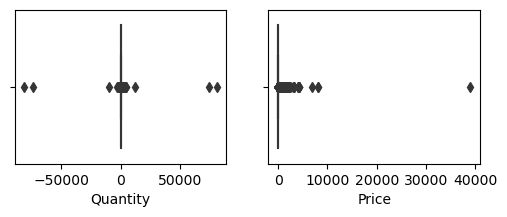

In [29]:
fig, axes = plt.subplots(1,2, figsize=(6,2))
sns.boxplot(x=eda['Quantity'], palette='viridis', ax=axes[0])
sns.boxplot(x=eda['Price'], palette='viridis', ax=axes[1])

There are extreme values on `Price` and negative values on `Quantity`, we have to handle it later

<AxesSubplot:xlabel='Price'>

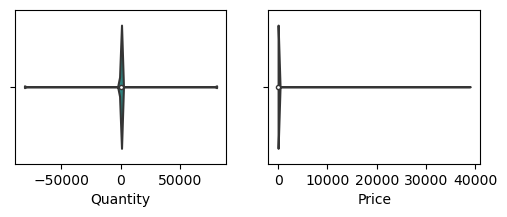

In [30]:
fig, axes = plt.subplots(1,2, figsize=(6,2))
sns.violinplot(x=eda['Quantity'], palette='viridis', ax=axes[0])
sns.violinplot(x=eda['Price'], palette='viridis', ax=axes[1])

# Data Pre Processing

## Drop Missing Values

We can't do imputation on `Unique Identifier` and `Description` features

In [3]:
data = data.dropna()
print(f'Dataset consist of {data.shape[0]} Rows and {data.shape[1]} Columns')

Dataset consist of 406830 Rows and 8 Columns


In [108]:
# check
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

## Handling Strage Values and Outlier

In [4]:
# filter, use only positive `Quantity` feature
data = data[data['Quantity'] > 0]
print(f'Dataset consist of {data.shape[0]} Rows and {data.shape[1]} Columns')

Dataset consist of 397925 Rows and 8 Columns


In [5]:
data[data['Quantity'] > 10000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [6]:
# filter data['Quantity'] < 10000
data = data[data['Quantity'] < 10000]
print(f'Dataset consist of {data.shape[0]} Rows and {data.shape[1]} Columns')

Dataset consist of 397922 Rows and 8 Columns


In [40]:
# Price feature
data['Price'].describe()

count    397925.000000
mean          3.116212
std          22.096773
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: Price, dtype: float64

In [44]:
data[data['Price'] > 10000].shape

(0, 8)

Outlier Data has been already dropped when filtering

## Feature Engineering

In [7]:
# change data type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Check min and max
print('Max Date : ', data['InvoiceDate'].max())
print('Min Date : ', data['InvoiceDate'].min())

Max Date :  2011-12-09 12:50:00
Min Date :  2010-12-01 08:26:00


In [8]:
df = data.copy()

In [9]:
# create new features
df['Dayofmonth'] = df['InvoiceDate'].dt.day
df['Day_name'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Hour'] = df['InvoiceDate'].dt.hour

In [10]:
# create sales feature
df['Sales'] = df['Price']*df['Quantity']

In [116]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Dayofmonth,Day_name,Month,Year,Hour,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,Wednesday,12,2010,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,Wednesday,12,2010,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,Wednesday,12,2010,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,Wednesday,12,2010,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,Wednesday,12,2010,8,20.34


# Business Insights

## Top 10 Countries by Num of Customers

Text(0.5, 1.0, 'Most Customers by Country')

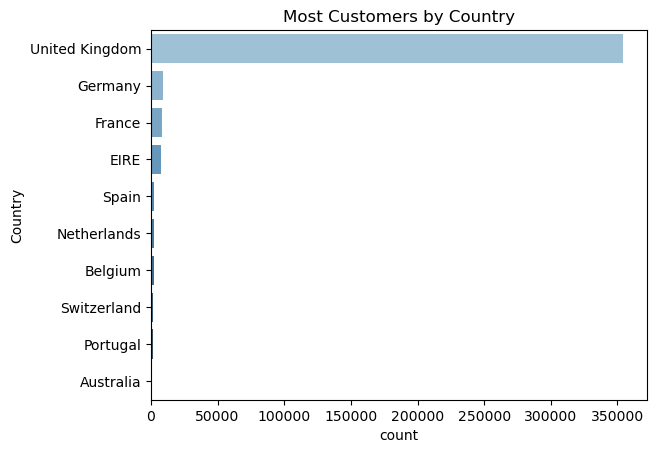

In [117]:
sns.countplot(y=df['Country'], palette='Blues_d', order=df['Country'].value_counts().iloc[:10].index)
plt.title('Most Customers by Country', fontsize=12)

## Top 10 Countries by Sales

Text(0.5, 1.0, 'Top 10 Countries with Highest Sales')

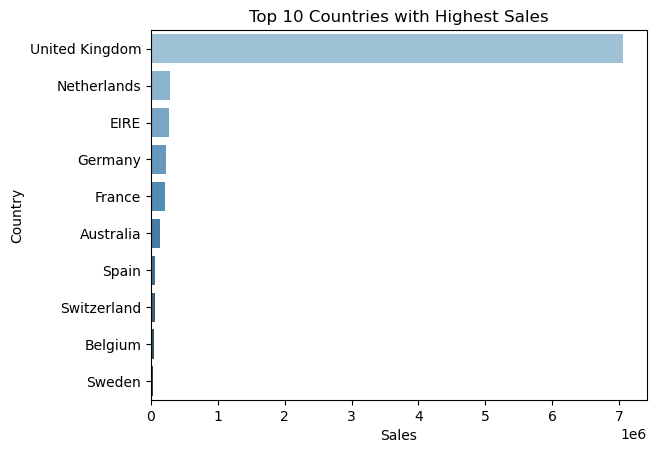

In [118]:
sns.barplot(y='Country', x='Sales', palette='Blues_d', 
            data=df.groupby('Country').agg(Sales=('Sales','sum')).reset_index().nlargest(10, 'Sales'))
plt.title('Top 10 Countries with Highest Sales', fontsize=12)

## Top 10 Best Seller Product

Text(0.5, 1.0, 'Top 10 Best Seller Products')

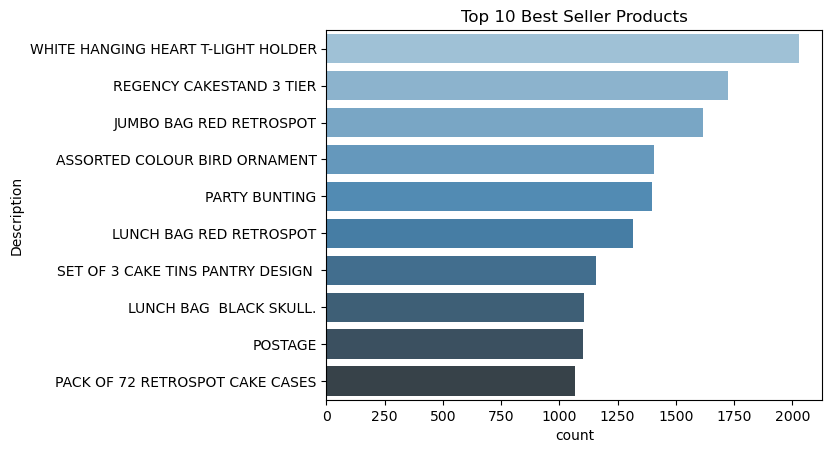

In [119]:
sns.countplot(y=df['Description'], palette='Blues_d', order=df['Description'].value_counts().iloc[:10].index)
plt.title('Top 10 Best Seller Products', fontsize=12)

## Top 10 Highest Quantity Product Sold

Text(0.5, 1.0, 'Top 10 Highest Quantity Sold')

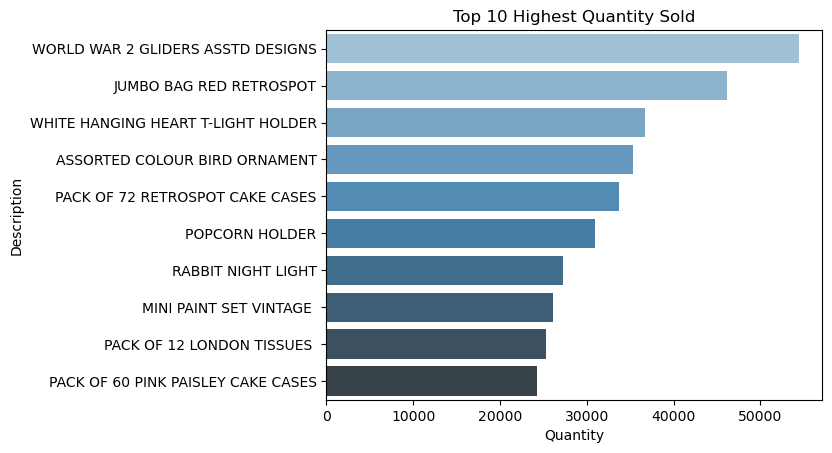

In [120]:
sns.barplot(y='Description', x='Quantity', palette='Blues_d', 
            data=df.groupby('Description').agg(Quantity=('Quantity','sum')).reset_index().nlargest(10, 'Quantity'))
plt.title('Top 10 Highest Quantity Sold', fontsize=12)

## Top 10 Highest Sales Products

Text(0.5, 1.0, 'Top 10 Highest Sales Products')

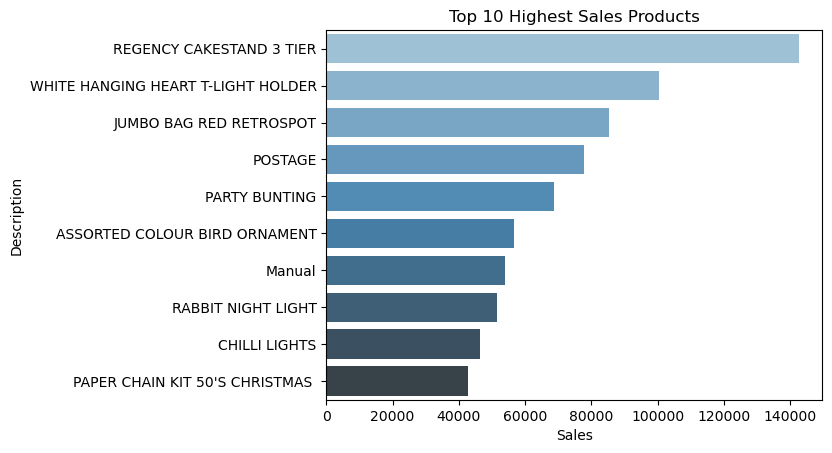

In [121]:
sns.barplot(y='Description', x='Sales', palette='Blues_d', 
            data=df.groupby('Description').agg(Sales=('Sales','sum')).reset_index().nlargest(10, 'Sales'))
plt.title('Top 10 Highest Sales Products', fontsize=12)

## Num Transaction by Month (year =  2011)

<AxesSubplot:xlabel='Month', ylabel='count'>

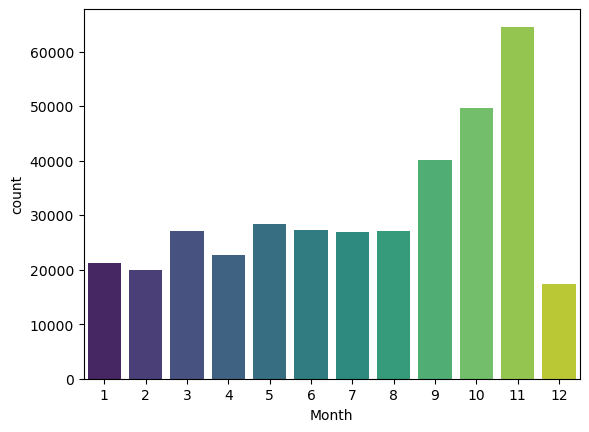

In [127]:
df2011 = df[df['Year'] == 2011]
sns.countplot(x='Month', data=df2011, palette='viridis')

## Top Sales by Month (2011)

<AxesSubplot:xlabel='Month', ylabel='Sales'>

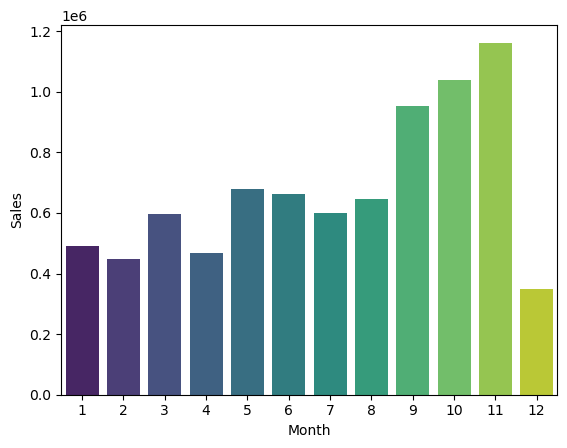

In [123]:
sns.barplot(x='Month', y='Sales', 
            data=df2011.groupby('Month').agg(Sales=('Sales','sum')).reset_index(), 
            palette='viridis')

## Num of Transaction by Date (2011)

<AxesSubplot:xlabel='count', ylabel='Dayofmonth'>

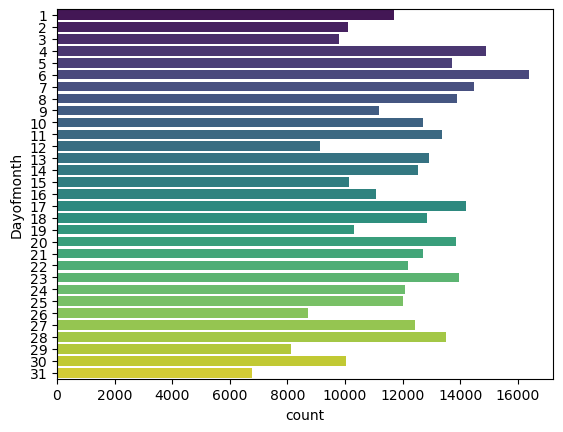

In [124]:
sns.countplot(y='Dayofmonth', data=df2011, palette='viridis')

## Num of Transaction by Day (2011)

<AxesSubplot:xlabel='Day_name', ylabel='count'>

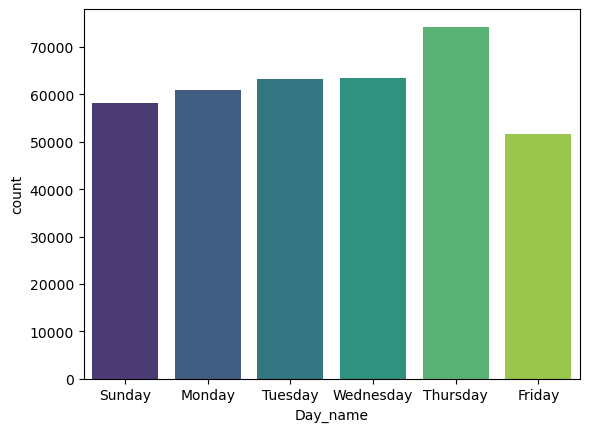

In [125]:
orders = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sns.countplot(x='Day_name', data=df2011, palette='viridis', order=orders)

## Num of Transaction by Hour (2011)

<AxesSubplot:xlabel='Hour', ylabel='count'>

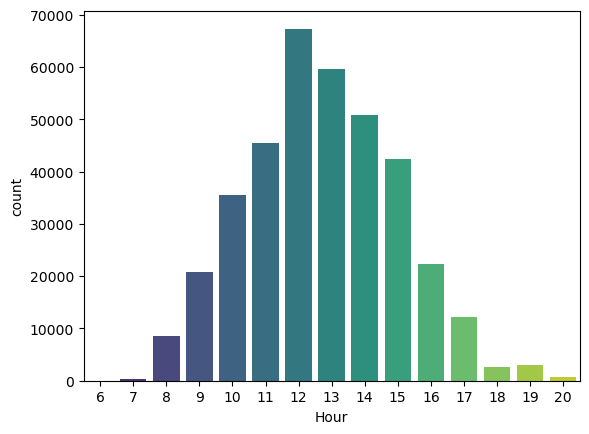

In [126]:
sns.countplot(x='Hour', data=df2011, palette='viridis')

## Monthly Repeated Customers

In [138]:
# we're taking all of the transactions that occurred before December 01, 2011 
df_new = df.loc[df['InvoiceDate'] < '2011-12-01']

In [139]:
# Get total amount spent(Sales) per invoice and associate it with CustomerID and Country
invoice_groupby_df = df_new.groupby(by=['Invoice', 'InvoiceDate']).agg({'Sales': sum, 
                                                                        'Customer ID': max,
                                                                        'Country': max,}).reset_index()

# Sort on Amount spent, this gives us the largest invoices
invoice_groupby_df = invoice_groupby_df.sort_values(by='Sales', ascending=False) 
invoice_groupby_df.head(10)

,Invoice,InvoiceDate,Sales,Customer ID,Country
7948,556444,2011-06-10 15:28:00,38970.00,15098.0,United Kingdom
12445,567423,2011-09-20 11:05:00,31698.16,17450.0,United Kingdom
8134,556917,2011-06-15 13:37:00,22775.93,12415.0,Australia
14486,572209,2011-10-21 12:08:00,22206.00,18102.0,United Kingdom
12437,567381,2011-09-20 10:12:00,22104.80,17450.0,United Kingdom
10868,563614,2011-08-18 08:51:00,21880.44,12415.0,Australia
5480,550461,2011-04-18 13:20:00,21535.90,15749.0,United Kingdom
14398,572035,2011-10-20 12:03:00,20277.92,14646.0,Netherlands
10636,563076,2011-08-11 16:12:00,19150.66,14646.0,Netherlands
10368,562439,2011-08-04 18:06:00,18841.48,12931.0,United Kingdom


In [142]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)

monthly_repeat_customers = invoice_groupby_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'Customer ID']).filter(lambda x: len(x) > 1).resample('M').nunique()['Customer ID'].reset_index()

# we group into 2 conditions, grouper(freq='M', means by monthly date) and groupby Cust. ID
# here the filtering rule, lambda x: len(x) > 1, means we want to retrive ....
# .. those customers with more than 1 order in given month
# last, we resample and aggregate by each month and count the number of unique customer 

monthly_repeat_customers

,InvoiceDate,Customer ID
0,2010-12-31,263
1,2011-01-31,153
2,2011-02-28,153
3,2011-03-31,203
4,2011-04-30,170
5,2011-05-31,281
6,2011-06-30,220
7,2011-07-31,227
8,2011-08-31,198
9,2011-09-30,272


Text(0.5, 0, 'Num of Customers')

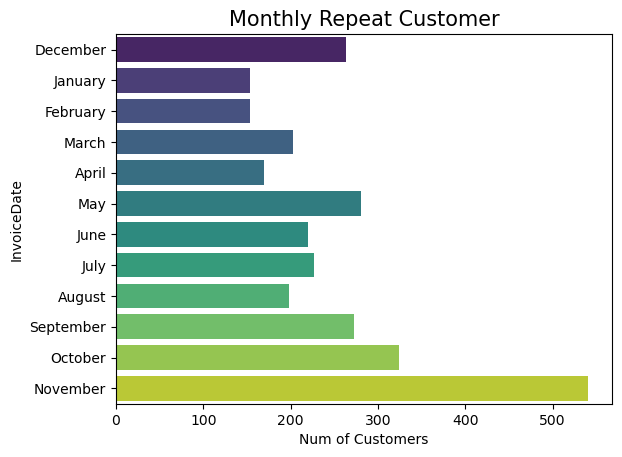

In [191]:
month_order = ['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30', '2011-05-31',
               '2011-06-30','2011-07-31', '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30']
ytics = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']


a = sns.barplot(y='InvoiceDate', x='Customer ID', data=monthly_repeat_customers, palette='viridis')
a.set_yticklabels(ytics)
plt.title('Monthly Repeat Customer', fontsize=15)
plt.xlabel('Num of Customers')

## Monthly Unique Customers

In [154]:
# now lets compare monthly_repeat_customers againts the total number of monthly customers 
monthly_unique_customers = df_new.set_index('InvoiceDate')['Customer ID'].resample('M').nunique().reset_index()
monthly_unique_customers 

,InvoiceDate,Customer ID
0,2010-12-31,885
1,2011-01-31,740
2,2011-02-28,758
3,2011-03-31,974
4,2011-04-30,856
5,2011-05-31,1056
6,2011-06-30,991
7,2011-07-31,949
8,2011-08-31,935
9,2011-09-30,1266


Text(0.5, 0, 'Num of Customers')

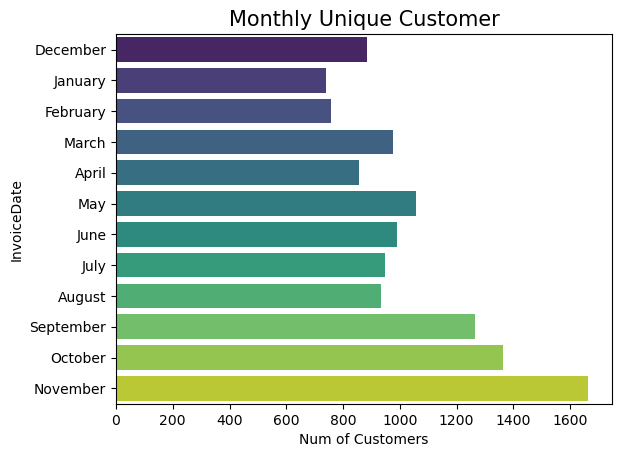

In [192]:
ytics = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

b = sns.barplot(y='InvoiceDate', x='Customer ID', data=monthly_unique_customers, palette='viridis')
b.set_yticklabels(ytics)
plt.title('Monthly Unique Customer', fontsize=15)
plt.xlabel('Num of Customers')

In [187]:
# repeat customer
monthly_repeat_customer = invoice_groupby_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'Customer ID']).filter(lambda x: len(x) > 1).resample('M').nunique()['Customer ID']

# unique customer
monthly_unique_customer = df_new.set_index('InvoiceDate')['Customer ID'].resample('M').nunique()

monthly_repeat_percentages = (monthly_repeat_customer/monthly_unique_customer*100)

# Ratio of Repeat to Unique customers
monthly_repeat_percentage = (monthly_repeat_customer/monthly_unique_customer*100).reset_index()
monthly_repeat_percentage 

,InvoiceDate,Customer ID
0,2010-12-31,29.717514
1,2011-01-31,20.675676
2,2011-02-28,20.184697
3,2011-03-31,20.841889
4,2011-04-30,19.859813
5,2011-05-31,26.609848
6,2011-06-30,22.199798
7,2011-07-31,23.919916
8,2011-08-31,21.176471
9,2011-09-30,21.484992


Text(0.5, 0, 'Percentage Repeat Customers (%)')

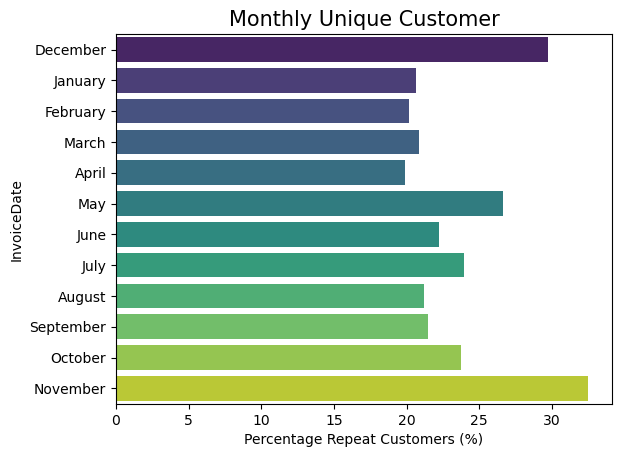

In [193]:
ytics = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
xtics = ['0%', '5%', '10%', '15%', '20%', '25%', '30%']
c = sns.barplot(y='InvoiceDate', x='Customer ID', data=monthly_repeat_percentage, palette='viridis')
c.set_yticklabels(ytics)
plt.title('Monthly Unique Customer', fontsize=15)
plt.xlabel('Percentage Repeat Customers (%)')

## Number of Unique Customers vs. Repeat Customers Over Time

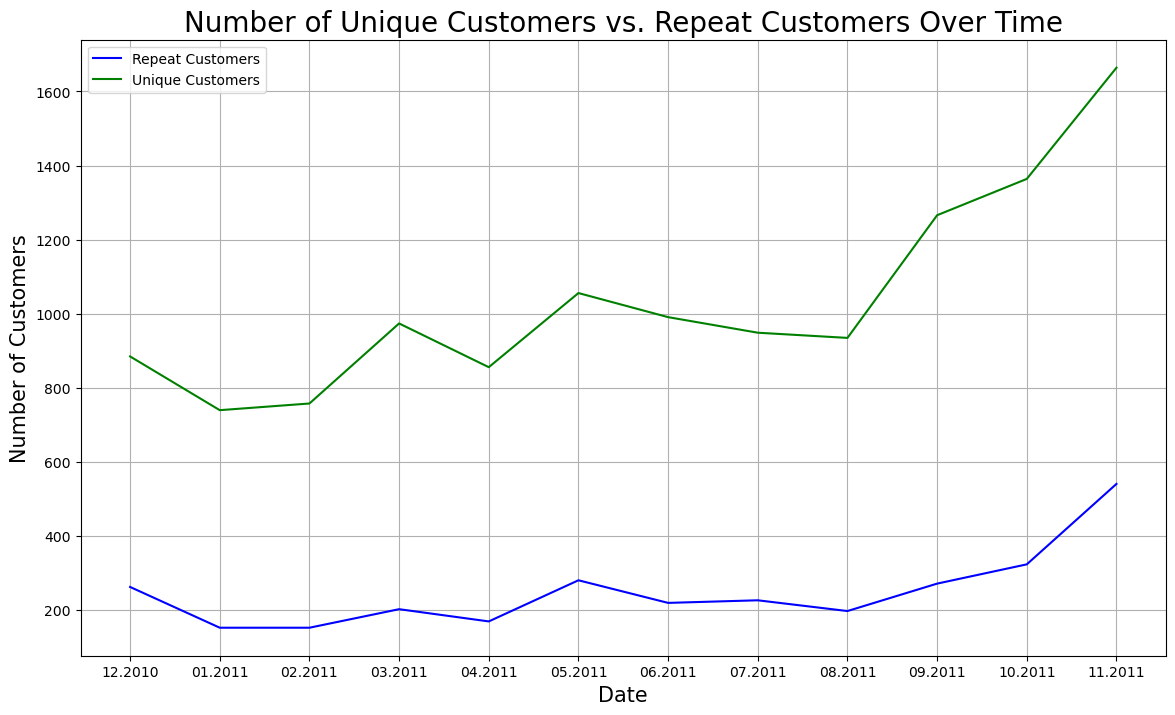

In [190]:
# plot repeat customers
ax = pd.DataFrame(monthly_repeat_customer.values).plot(figsize=(14,8), color='Blue')

# plot unique custoemrs
pd.DataFrame(monthly_unique_customer.values).plot(ax=ax,grid=True, color='Green')

ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Unique Customers vs. Repeat Customers Over Time', fontsize=20)
plt.legend(['Repeat Customers', 'Unique Customers'])
plt.xticks(range(len(monthly_repeat_customer.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customer.index])

plt.show()

## Number of Repeat Customers Ratio to Unique Customers Over Time

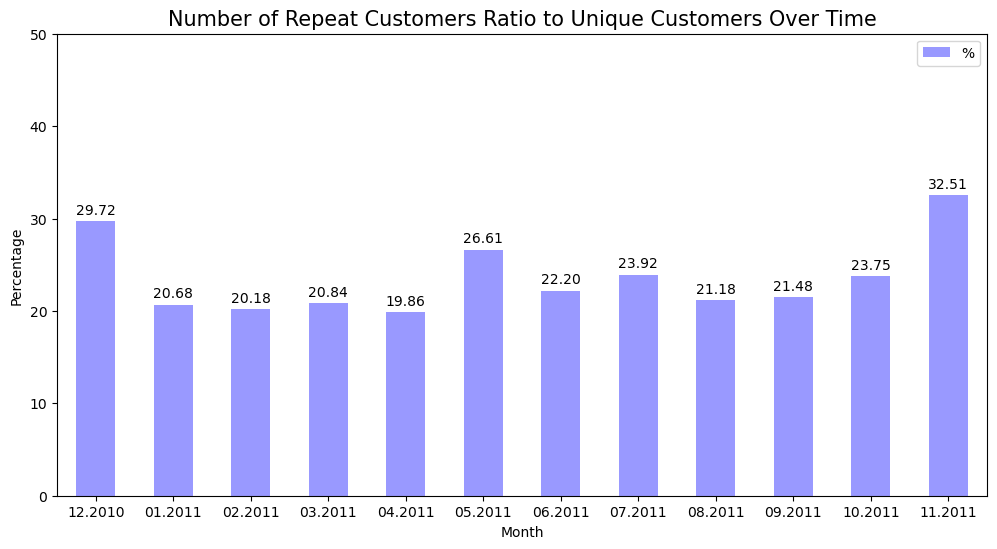

In [203]:
ax = pd.DataFrame(monthly_repeat_percentages.values).plot.bar(figsize=(12,6), color='Blue', alpha=0.4)

# Iterrating over the bars one-by-one
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


ax.set_ylim([0, 50])
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Percentage', fontsize=10)
ax.set_title('Number of Repeat Customers Ratio to Unique Customers Over Time', fontsize=15)
plt.legend('%')
plt.xticks(range(len(monthly_repeat_customer.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customer.index], rotation=0)
plt.show()

## Monthly Revenue vs Monthly Revenue Repeat Customers

In [204]:
# Let's investigate the relationship between revenue and repeat customers
monthly_revenue = df_new.set_index('InvoiceDate')['Sales'].resample('M').sum()

# monthly revenue repeat customer
monthly_rev_repeat_cust = invoice_groupby_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'Customer ID']).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_cust = monthly_rev_repeat_cust/monthly_revenue * 100.0

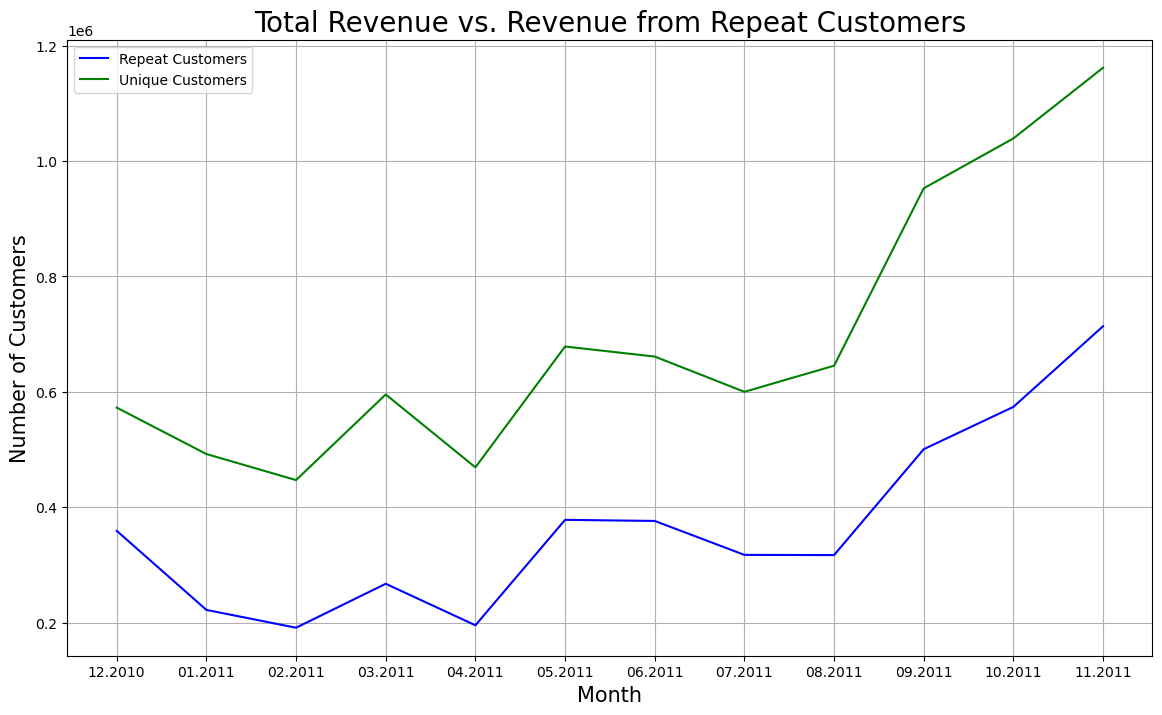

In [206]:
# Plotting this visually
# Note we're using a 2 scale y axis (left and right)
# we are using secondary_y = True, to do 2 scales of y axis

ax = pd.DataFrame(monthly_rev_repeat_cust.values).plot(figsize=(14,8), color='Blue')

pd.DataFrame(monthly_revenue.values).plot(ax=ax,grid=True, color='Green')



ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Total Revenue vs. Revenue from Repeat Customers', fontsize=20)
plt.legend(['Repeat Customers', 'Unique Customers'])

plt.xticks(range(len(monthly_rev_repeat_cust.index)), [x.strftime('%m.%Y') for x in monthly_rev_repeat_cust.index], rotation=0)


    
plt.show()

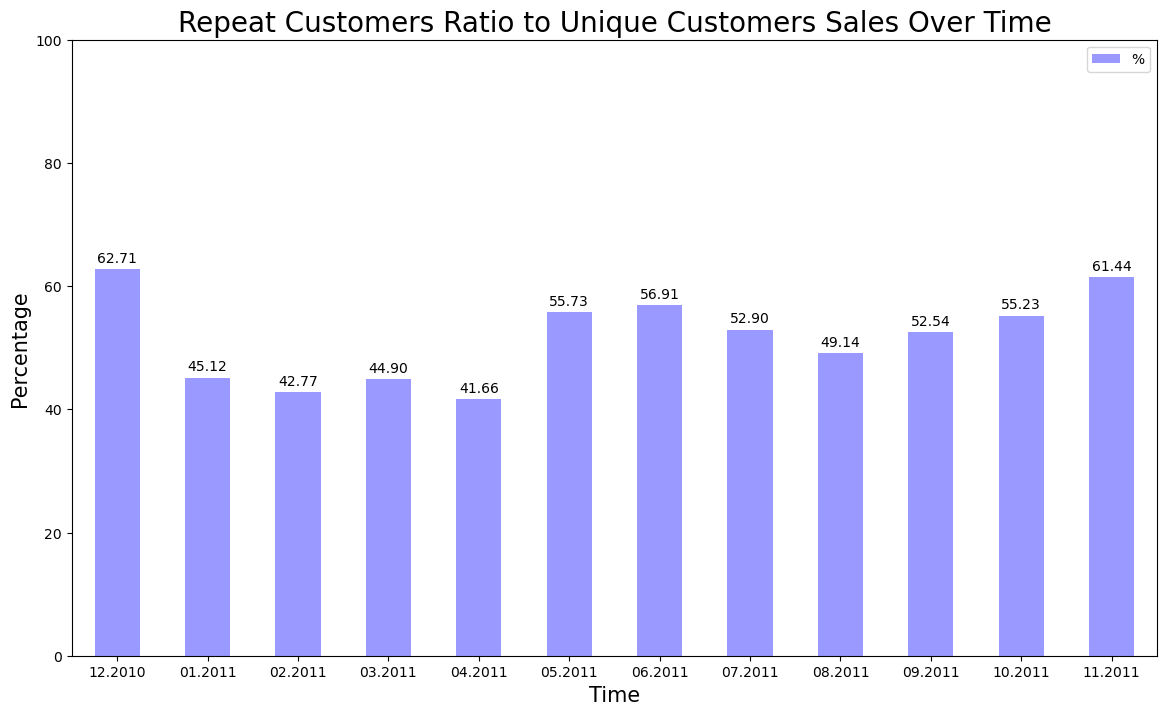

In [208]:
ax = pd.DataFrame(monthly_rev_perc_repeat_cust.values).plot.bar(figsize=(14,8), color='Blue', alpha=0.4)

# Iterrating over the bars one-by-one
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


ax.set_ylim([0, 100])
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Percentage', fontsize=15)
ax.set_title('Repeat Customers Ratio to Unique Customers Sales Over Time', fontsize=20)
plt.legend('%')
plt.xticks(range(len(monthly_rev_repeat_cust.index)), [x.strftime('%m.%Y') for x in monthly_rev_repeat_cust.index], rotation=0)

plt.show()

# Customer Lifetime Values

In [11]:
clv_cols = ['Customer ID', 'InvoiceDate', 'Sales']
clv_data = df[clv_cols]
clv_data.head()

,Customer ID,InvoiceDate,Sales
0,17850.0,2010-12-01 08:26:00,15.30
1,17850.0,2010-12-01 08:26:00,20.34
2,17850.0,2010-12-01 08:26:00,22.00
3,17850.0,2010-12-01 08:26:00,20.34
4,17850.0,2010-12-01 08:26:00,20.34


In [12]:
from lifetimes.plotting import *
from lifetimes.utils import *

#Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase) 
#into summary data (a frequency, recency, age and monetary).

clv_data = summary_data_from_transaction_data(clv_data, 'Customer ID', 'InvoiceDate', monetary_value_col='Sales', observation_period_end='2011-12-9')
clv_data.reset_index().head()

,Customer ID,frequency,recency,T,monetary_value
0,12347.0,6.0,365.0,367.0,599.701667
1,12348.0,3.0,283.0,358.0,301.480000
2,12349.0,0.0,0.0,18.0,0.000000
3,12350.0,0.0,0.0,310.0,0.000000
4,12352.0,6.0,260.0,296.0,368.256667


1. frequency <br>
frequency represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases. This is actually slightly wrong. It’s the count of time periods the customer had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on.


2. T <br>
T represents the age of the customer in whatever time units chosen (weekly, in the above dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.


3. Recency <br>
recency represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)


4. monetary_value <br>
monetary_value represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases. Note that the denominator here is different than the frequency described above.

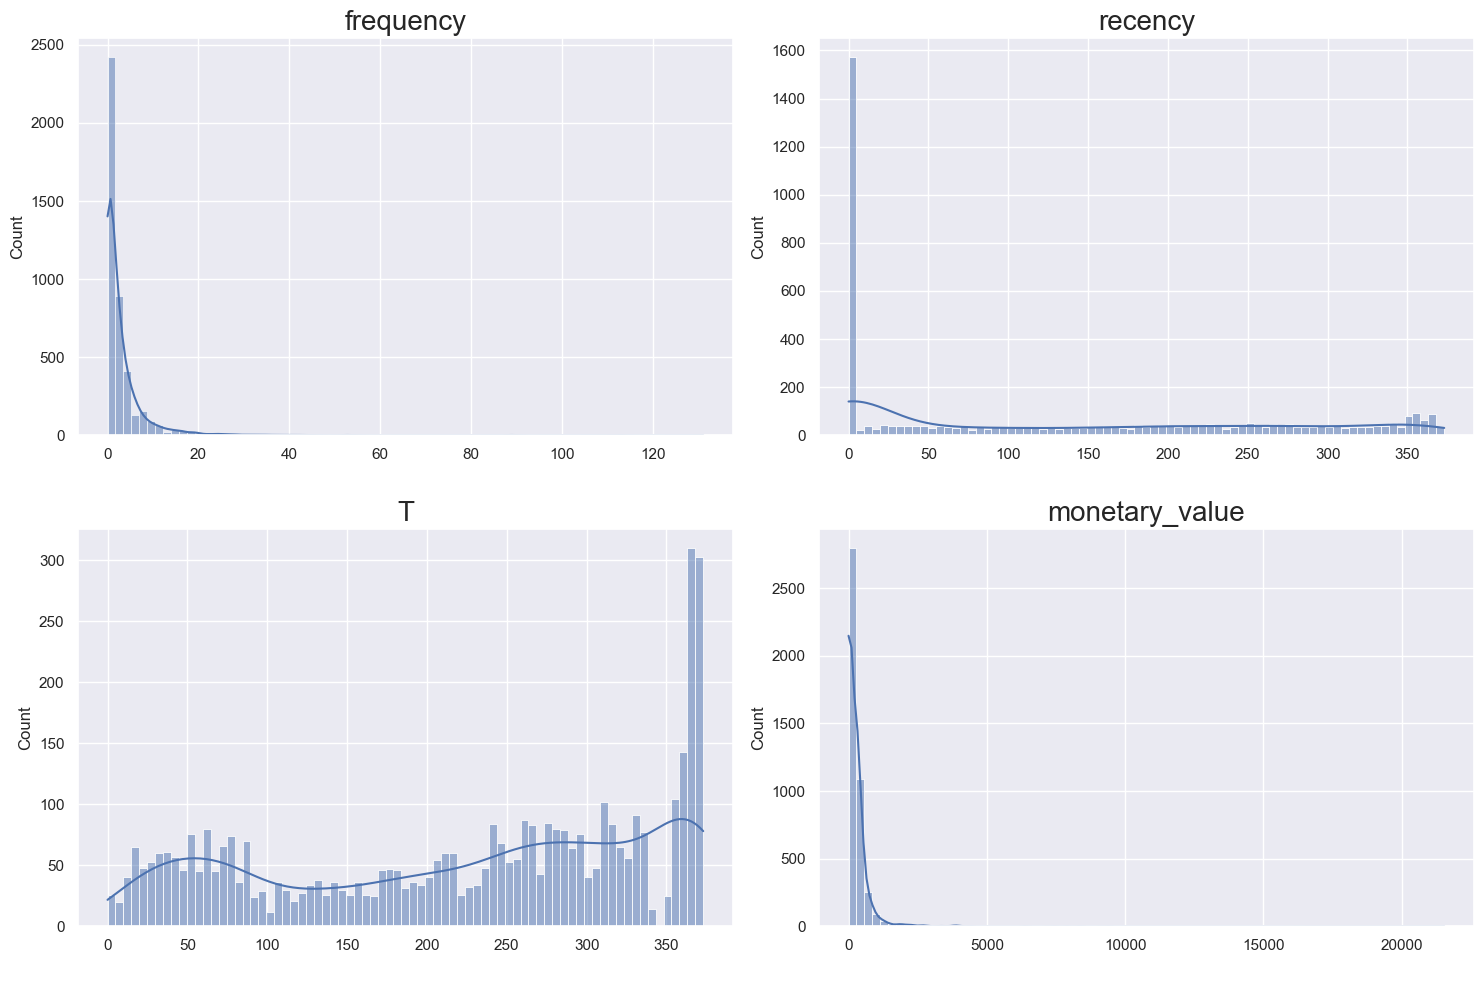

In [221]:
plt.figure(figsize=(15,10))
for col in range(0, len(clv_data.columns)):
    plt.subplot(2,2,col+1)
    sns.histplot(x=clv_data[clv_data.columns[col]], bins=75, kde=True, palette='Blues_d')
    plt.xlabel(' ')
    plt.title(clv_data.columns[col], fontsize=20)
    plt.tight_layout()
    

In [13]:
# lets check frequency column, how much does the one time buyer in the column (frequency = 0)
one_time_buyer = print('one_time_buyer:', round(sum(clv_data['frequency'] == 0)/(len(clv_data['frequency'])),3)*100, '%')

one_time_buyer: 35.699999999999996 %


In [14]:
from lifetimes import BetaGeoFitter

# similar API to scikit-learn and lifelines.
betageo = BetaGeoFitter(penalizer_coef=0.0)
betageo.fit(clv_data['frequency'], clv_data['recency'], clv_data['T'])
print(betageo)
betageo.summary

<lifetimes.BetaGeoFitter: fitted with 4337 subjects, a: 0.00, alpha: 68.88, b: 6.74, r: 0.83>


,coef,se(coef),lower 95% bound,upper 95% bound
r,0.826458,0.026786,0.773957,0.878959
alpha,68.876851,2.611034,63.759224,73.994477
a,0.003453,0.010349,-0.016832,0.023737
b,6.741804,22.350681,-37.065530,50.549138


## Visualizing our Frequency/Recency Matrix

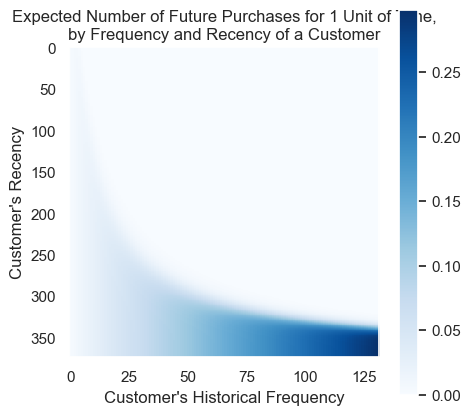

In [224]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(betageo, cmap='Blues')
plt.grid(False)

We can see that if a customer has bought 125 times from us, and their latest purchase was when they were 350 days old (given the individual is 350 days old), then they are our best customer (bottom-right). 

Our coldest customers are those that are in the top-right corner: they bought a lot quickly, and we haven’t seen them in months.

There’s also that beautiful 'tail' around (25,250). That represents the customer who buys infrequently, but we’ve seen them recently, so they might buy again - we’re not sure if they are dead or just between purchases.

Another interesting matrix to look at is the probability of still being alive:

## Probability of still being alive Matrix

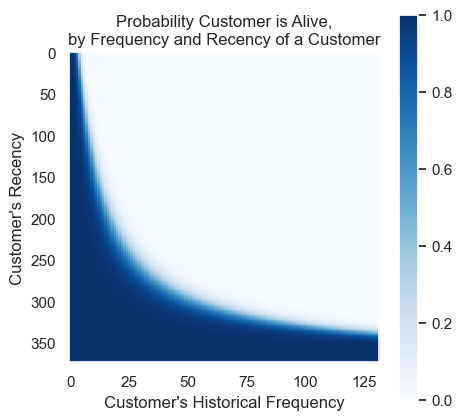

In [225]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(betageo, cmap='Blues')
plt.grid(False)

## Ranking Customers From Best to Worst

In [15]:
#Predict future transaction in next 14 (2 weeks) days

t = 14
clv_data['predicted_purchases'] = betageo.conditional_expected_number_of_purchases_up_to_time(t, 
                                                                                              clv_data['frequency'], 
                                                                                              clv_data['recency'], 
                                                                                              clv_data['T'])


clv_data.sort_values(by='predicted_purchases', ascending=False).head(11)

,frequency,recency,T,monetary_value,predicted_purchases
Customer ID,,,,,
14911.0,131.0,372.0,373.0,1093.661679,4.176302
12748.0,113.0,373.0,373.0,298.360885,3.606076
17841.0,111.0,372.0,373.0,364.452162,3.542683
15311.0,89.0,373.0,373.0,677.729438,2.845725
14606.0,88.0,372.0,373.0,135.890114,2.814021
12971.0,70.0,369.0,372.0,159.211286,2.248807
13089.0,65.0,367.0,369.0,893.714308,2.104388
14527.0,53.0,367.0,369.0,155.016415,1.720749
13798.0,52.0,371.0,372.0,706.650962,1.677302


<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

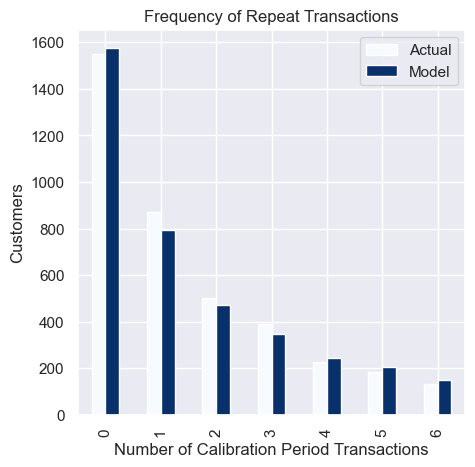

In [227]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(betageo, cmap='Blues')

In [228]:
# lets try predicting customer in 30 days ahead
# using random customer ID, 12971

t = 30
customer = clv_data.loc[12971]
betageo.predict(t, customer['frequency'], customer['recency'], customer['T'])

4.818597087153028

OBSERVATION: Our model predicts that customer with 12971 ID’s, future transaction is approx 4-5 in 30 days.

## Cross Validation

In [229]:
# check range of the invoice date
print('Date Range: %s to %s' % (data['InvoiceDate'].min(), data['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [230]:
cal_holdout = calibration_and_holdout_data(data,
                                            'Customer ID', 
                                            'InvoiceDate',
                                            calibration_period_end='2011-08-09',
                                            observation_period_end='2011-12-09')     


cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
12347.0,4.0,238.0,245.0,2.0,122.0
12348.0,2.0,110.0,236.0,1.0,122.0
12350.0,0.0,0.0,188.0,0.0,122.0
12352.0,3.0,34.0,174.0,3.0,122.0
12353.0,0.0,0.0,82.0,0.0,122.0


<AxesSubplot:title={'center':'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

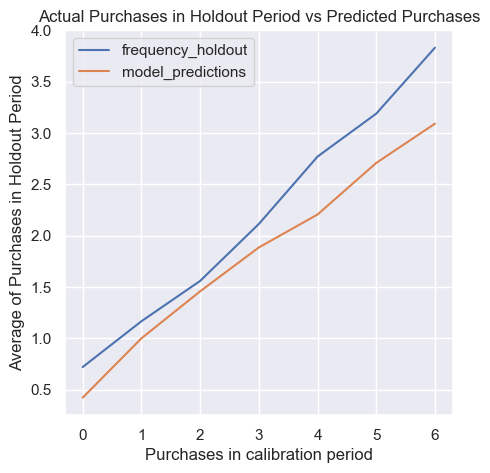

In [231]:
betageo = BetaGeoFitter(penalizer_coef = 0.1)
betageo.fit(cal_holdout['frequency_cal'], cal_holdout['recency_cal'], cal_holdout['T_cal'])

plot_calibration_purchases_vs_holdout_purchases(betageo, cal_holdout)

- As we can see, the lines are pretty close together. 
- The model is not far off at predicting the number of orders each customer will make.
- I use penalizer_coef = 0.1 bcs if use the default number
- The model did not converge. Then I try adding a larger penalizer to see if that helps convergence.

## Estimating customer lifetime value using the Gamma-Gamma model

For this whole time we didn’t take into account the economic value of each transaction and we focused mainly on transactions’ occurrences. To estimate this we can use the Gamma-Gamma submodel. But first we need to create summary data from transactional data also containing economic values for each transaction (i.e. profits or revenues



In [232]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
clv_data[['monetary_value', 'frequency']].corr()


,monetary_value,frequency
monetary_value,1.000000,0.240472
frequency,0.240472,1.000000


The model we are going to use to estimate the CLV for our userbase is called the Gamma-Gamma submodel, which relies upon an important assumption. The Gamma-Gamma submodel, in fact, assumes that there is no relationship between the monetary value and the purchase frequency. In practice we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

## Transforming out dataset

In [16]:
# Our returning customers summary
returning_customers = clv_data[clv_data['frequency']>0]

print(returning_customers.head())

             frequency  recency      T  monetary_value  predicted_purchases
Customer ID                                                                
12347.0            6.0    365.0  367.0      599.701667             0.219186
12348.0            3.0    283.0  358.0      301.480000             0.125387
12352.0            6.0    260.0  296.0      368.256667             0.261758
12356.0            2.0    303.0  325.0      269.905000             0.100409
12358.0            1.0    149.0  150.0      683.200000             0.116761


## The Gamma-Gamma model and the independence assumption

The model we are going to use to estimate the CLV for our userbase is called the Gamma-Gamma submodel, which relies upon an important assumption. The Gamma-Gamma submodel, in fact, assumes that there is no relationship between the monetary value and the purchase frequency. In practice we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

At this point we can train our Gamma-Gamma submodel and predict the conditional, expected average lifetime value of our customers.


In [17]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers['frequency'], returning_customers['monetary_value'])

print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2789 subjects, p: 2.09, q: 3.53, v: 502.44>


In [18]:
predicted_monetary = ggf.conditional_expected_average_profit(returning_customers['frequency'], 
                                                             returning_customers['monetary_value'])
predicted_monetary

Customer ID
12347.0    568.498842
12348.0    333.928753
12352.0    375.978998
12356.0    324.373809
12358.0    535.732623
              ...    
18272.0    473.385512
18273.0    203.989507
18282.0    262.201047
18283.0    175.110951
18287.0    490.003761
Length: 2789, dtype: float64

In [19]:
# Average Order Value
# Now we’ll take the Series returned by the above function and assign it to a dataframe, 
# placing the predicted AOV value in its own column and leaving the customer_id value in the index.

aov_df = pd.DataFrame(predicted_monetary,columns = ['aov'])
aov_df = aov_df.sort_values(by='aov', ascending=False)
aov_df

,aov
Customer ID,
15749.0,9958.013407
18102.0,8935.957084
12415.0,7303.069742
17450.0,7093.062003
14646.0,6206.991760
...,...
16668.0,122.064808
14560.0,115.372755
15107.0,113.621394


<AxesSubplot:xlabel='aov', ylabel='Density'>

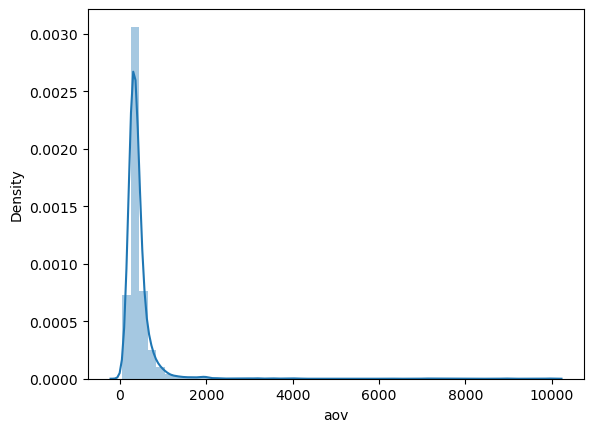

In [20]:
# plot AOV
sns.distplot(aov_df['aov'])

## Yeaaa! Customer Life Time Values

In [21]:
betageo.fit(clv_data['frequency'], clv_data['recency'], clv_data['T'])

CLV = ggf.customer_lifetime_value(
    betageo, 
    clv_data['frequency'], 
    clv_data['recency'], 
    clv_data['T'], 
    clv_data['monetary_value'], time=2, # 2 months
    discount_rate=0.001)
    # monthly discount rate ~ 0.75% in 2011 (source: statista)

CLV.head(10)

Customer ID
12347.0    533.172916
12348.0    179.158887
12349.0    235.976531
12350.0     54.121913
12352.0    421.095215
12353.0     75.143699
12354.0     68.151347
12355.0     72.487539
12356.0    139.364303
12357.0    201.240476
Name: clv, dtype: float64

In [22]:
clv = pd.DataFrame(CLV)
clv.head(5)

,clv
Customer ID,
12347.0,533.172916
12348.0,179.158887
12349.0,235.976531
12350.0,54.121913
12352.0,421.095215


In [24]:
clv.rename(columns={'clv':'Cust_LTV'}, inplace=True)
clv.head()

,Cust_LTV
Customer ID,
12347.0,533.172916
12348.0,179.158887
12349.0,235.976531
12350.0,54.121913
12352.0,421.095215


In [25]:
# check missing values
clv.isnull().sum()

Cust_LTV    0
dtype: int64

In [27]:
# show RFM data: clv_data
RFM_data = clv_data.reset_index()
RFM_data.head()

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases
0,12347.0,6.0,365.0,367.0,599.701667,0.219186
1,12348.0,3.0,283.0,358.0,301.480000,0.125387
2,12349.0,0.0,0.0,18.0,0.000000,0.133172
3,12350.0,0.0,0.0,310.0,0.000000,0.030538
4,12352.0,6.0,260.0,296.0,368.256667,0.261758


In [78]:
# join 2 dataframe on Customers ID
rfm = pd.merge(RFM_data, clv, on='Customer ID')
rfm.sort_values(by='frequency', ascending=False).head()

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases,Cust_LTV
1878,14911.0,131.0,372.0,373.0,1093.661679,4.176302,19430.892021
325,12748.0,113.0,373.0,373.0,298.360885,3.606076,4622.369671
4009,17841.0,111.0,372.0,373.0,364.452162,3.542683,5532.405562
2175,15311.0,89.0,373.0,373.0,677.729438,2.845725,8208.693177
1660,14606.0,88.0,372.0,373.0,135.890114,2.814021,1681.687867


In [79]:
# check persentile
rfm[['frequency', 
     'recency', 
     'T', 'monetary_value', 
     'Cust_LTV']].describe(percentiles=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
frequency,4337.0,2.865114,5.953891,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000,3.000000,4.000000,7.000000,131.000000
recency,4337.0,130.754439,132.220948,0.000000,0.000000,0.000000,0.000000,29.400000,93.00000,164.000000,223.200000,277.000000,340.000000,373.000000
T,4337.0,222.807471,117.857944,0.000000,45.000000,80.200000,148.000000,205.000000,248.00000,281.000000,311.200000,353.000000,366.000000,373.000000
monetary_value,4337.0,268.242366,552.000841,0.000000,0.000000,0.000000,0.000000,104.970000,176.94000,245.970000,323.281000,411.705000,588.786000,21535.900000
Cust_LTV,4337.0,346.177211,1173.118210,46.406026,64.506932,90.496954,120.688626,151.111171,181.63363,220.736037,271.810787,370.280511,575.327647,39407.254611


## RFM Segmentation

### Standardization

In [80]:
from sklearn.preprocessing import StandardScaler

sc_data = StandardScaler()
data_std = sc_data.fit_transform(rfm)

In [81]:
data_std = pd.DataFrame(data_std, columns=rfm.columns)
data_std.head()

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases,Cust_LTV
0,-1.716273,0.526588,1.771826,1.223585,0.600538,0.261045,0.159419
1,-1.715692,0.022658,1.151581,1.147213,0.060220,-0.213876,-0.142388
2,-1.715111,-0.481273,-0.989023,-1.737949,-0.486002,-0.174458,-0.093949
3,-1.714530,-0.481273,-0.989023,0.739896,-0.486002,-0.694108,-0.248985
4,-1.713368,0.526588,0.977610,0.621095,0.181206,0.476594,0.063870


### Elbow Method

<AxesSubplot:>

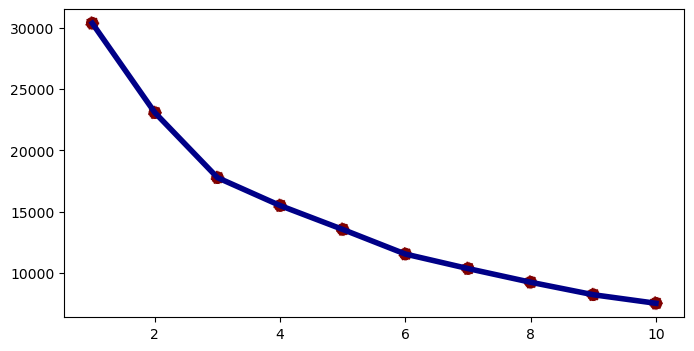

In [82]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))

# plt.plot(inertia)
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=100, color='#800000',  linestyle='--')

In [83]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)

# fit model 
kc = kmeans.fit(data_std.values)
cluster_labels = kc.labels_

# add cluster
data_cluster = data_std.assign(K_Cluster = cluster_labels)
data_cluster.head()

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases,Cust_LTV,K_Cluster
0,-1.716273,0.526588,1.771826,1.223585,0.600538,0.261045,0.159419,1
1,-1.715692,0.022658,1.151581,1.147213,0.060220,-0.213876,-0.142388,1
2,-1.715111,-0.481273,-0.989023,-1.737949,-0.486002,-0.174458,-0.093949,0
3,-1.714530,-0.481273,-0.989023,0.739896,-0.486002,-0.694108,-0.248985,0
4,-1.713368,0.526588,0.977610,0.621095,0.181206,0.476594,0.063870,1


In [84]:
# add label to 'data' dataframe
data_label = rfm.assign(K_Cluster = cluster_labels)
data_label.head()

,Customer ID,frequency,recency,T,monetary_value,predicted_purchases,Cust_LTV,K_Cluster
0,12347.0,6.0,365.0,367.0,599.701667,0.219186,533.172916,1
1,12348.0,3.0,283.0,358.0,301.480000,0.125387,179.158887,1
2,12349.0,0.0,0.0,18.0,0.000000,0.133172,235.976531,0
3,12350.0,0.0,0.0,310.0,0.000000,0.030538,54.121913,0
4,12352.0,6.0,260.0,296.0,368.256667,0.261758,421.095215,1


In [88]:
RFM = data_label[['frequency', 'recency', 'T', 'monetary_value', 'Cust_LTV']]
RFM.head()

,frequency,recency,T,monetary_value,Cust_LTV
0,6.0,365.0,367.0,599.701667,533.172916
1,3.0,283.0,358.0,301.480000,179.158887
2,0.0,0.0,18.0,0.000000,235.976531
3,0.0,0.0,310.0,0.000000,54.121913
4,6.0,260.0,296.0,368.256667,421.095215


### Insights

In [ ]:
for i in RFM.columns[]:
    plt.figure(figsize=(6,4))
    pl = sns.boxenplot(x = data_label['K_Cluster'], y = data_label[i], palette='viridis')
    pl.set_title(i, fontsize=15)
plt.show()

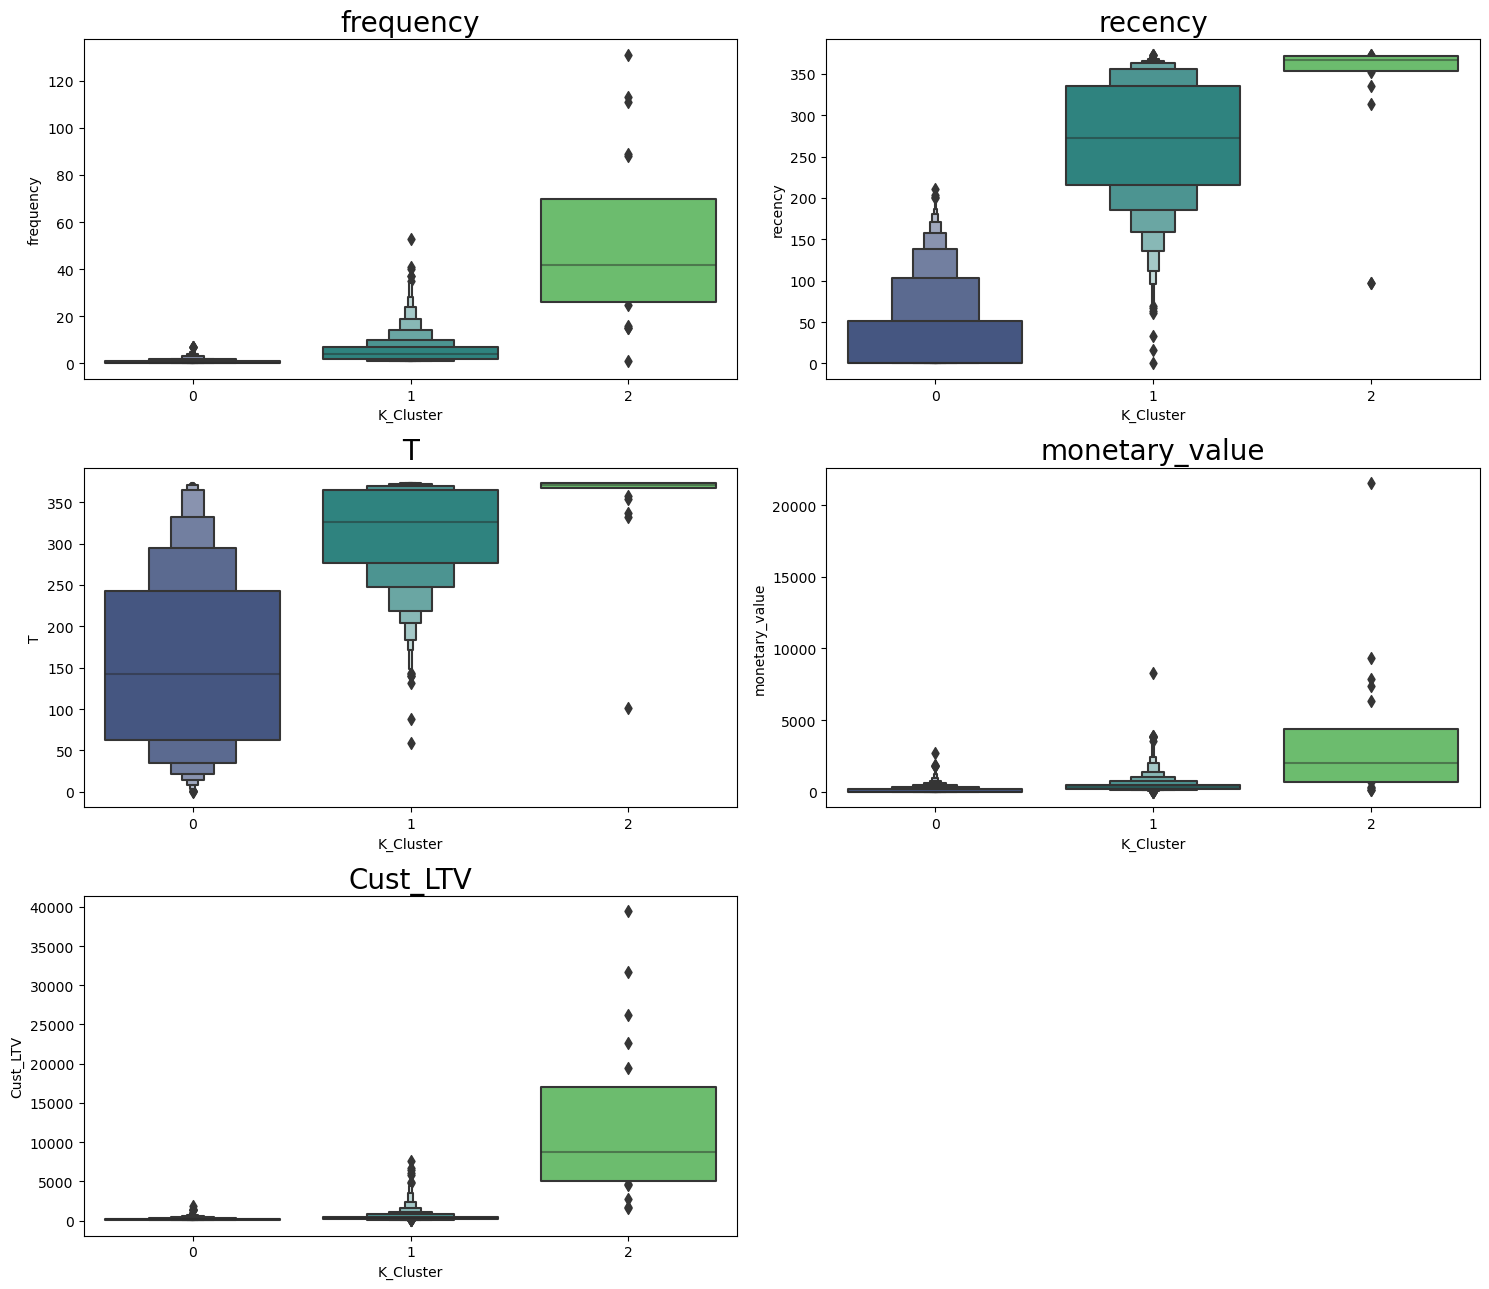

In [91]:
plt.figure(figsize=(15,13))
for col in range(0, len(RFM.columns)):
    plt.subplot(3,2,col+1)
    sns.boxenplot(x=data_label['K_Cluster'], y=data_label[RFM.columns[col]], palette='viridis')
    plt.title(RFM.columns[col], fontsize=20)
    plt.tight_layout()

In [96]:
rfm_normalized_melt = pd.melt(data_cluster, id_vars=['K_Cluster'], 
                              value_vars=['recency', 'frequency', 'monetary_value', 'T', 'Cust_LTV'],
                              var_name='Metric', value_name='Value')

In [97]:
rfm_normalized_melt.head()

,K_Cluster,Metric,Value
0,1,recency,1.771826
1,1,recency,1.151581
2,0,recency,-0.989023
3,0,recency,-0.989023
4,1,recency,0.977610


<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Metric', ylabel='Value'>

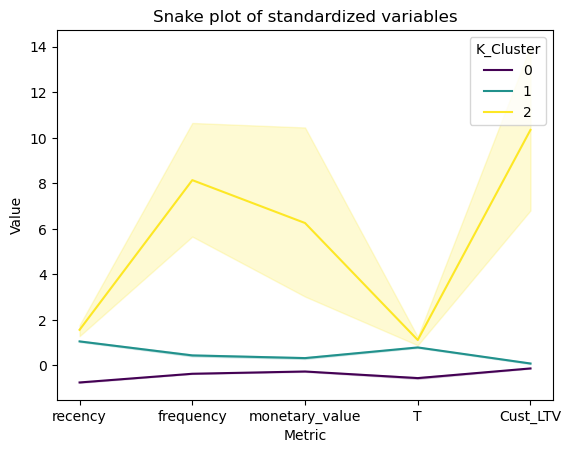

In [103]:
plt.title("Snake plot of standardized variables");
sns.lineplot(x='Metric', y='Value', hue='K_Cluster', data=rfm_normalized_melt, palette='viridis')

- K_Cluster 0 : `Low Spender` --> Spend less but most recently
- K_Cluster 1 : `Average Customers` -->  So so
- K_Cluster 2 : `Best Customers` --> Bought most frequently , high spender, highest CLV